# DIS08 / OR92 Data Modeling: Data Science Packages

Timo Breuer, Faculty of Information Science and Communication Studies, Institute of Information Management

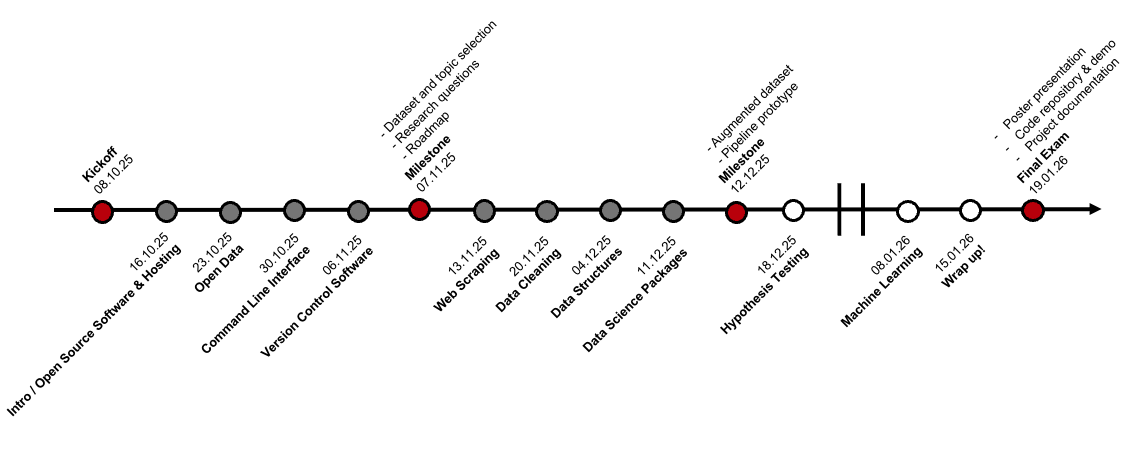

---
## Scope of today's session
---
 
- Overview of common Python data science packages
- Commonly used datasets (in education) 
- Basic statistics (with pandas)
- Data visualisation (with pandas, seaborn, matplotlib)

---
## Common Python Packages for Data Science 
--- 

**Data acquisition / web scraping / parsing**
- requests: https://docs.python-requests.org/en/latest/index.html
- beautifulsoup: https://beautiful-soup-4.readthedocs.io/en/latest/
- scrapy: https://scrapy.org/
- parsel: https://parsel.readthedocs.io/en/latest/

**Data analysis / numerical operations / statistics**
- pandas: https://pandas.pydata.org/
- numpy: http://www.numpy.org/
- scipy: https://www.scipy.org/
- statsmodels: https://www.statsmodels.org/stable/index.html

**Data visualisation / presentation**
- matplotlib: https://matplotlib.org/
- seaborn: https://seaborn.pydata.org/
- bokeh: https://bokeh.org/
- plotly: https://plotly.com/

**Machine learning / deep learning** 
- scikit-learn: https://scikit-learn.org/stable/
- tensorflow: https://www.tensorflow.org/
- keras: https://keras.io/
- pytorch: https://pytorch.org/

---
## Common Datasets
---

**Note: Many of these datasets can be directly loaded from data science packages, e.g., sklearn or seaborn. There is no need to download the datasets with your own scripts from the original source or somewhere else.**

### 1. Iris Dataset

**Description:** The Iris dataset is one of the most famous datasets in machine learning. It contains measurements of iris flowers from three different species: Setosa, Versicolor, and Virginica. The dataset includes four features: sepal length, sepal width, petal length, and petal width.

**Use Cases:** It is often used for classification tasks, particularly for demonstrating algorithms like k-Nearest Neighbors (k-NN), decision trees, and support vector machines (SVM).

**Size:** The dataset consists of 150 samples, with 50 samples for each species.

**Source:** https://archive.ics.uci.edu/dataset/53/iris

### 2. Titanic Dataset

**Description:** The Titanic dataset contains information about the passengers aboard the Titanic, including whether they survived or not. Features include passenger class, sex, age, number of siblings/spouses aboard, number of parents/children aboard, fare paid, and more.

**Use Cases:** This dataset is commonly used for binary classification tasks, such as predicting survival based on various features. It is also useful for demonstrating data preprocessing, feature engineering, and exploratory data analysis.

**Size:** The dataset contains 891 entries.

**Source:** https://www.openml.org/search?type=data&sort=runs&id=40945&status=active

### 3. Wine Quality Dataset

**Description:** The Wine Quality dataset contains information about red and white wines from Portugal. It includes various physicochemical tests (e.g., acidity, sugar, pH, alcohol content) and a quality score (ranging from 0 to 10) assigned by wine experts. The dataset is divided into two parts: one for red wine and one for white wine.

**Use Cases:** This dataset is typically used for regression tasks (predicting the quality score) and classification tasks (classifying wines into quality categories). It is useful for demonstrating regression algorithms, classification algorithms, and techniques for handling imbalanced datasets.

**Size:** The red wine dataset contains 1,599 samples, while the white wine dataset contains 4,898 samples.

**Source:** https://archive.ics.uci.edu/dataset/186/wine+quality

### (4. MNIST Dataset)

**Description:** The MNIST dataset is a large collection of handwritten digits (0-9) that is widely used for training various image processing systems. It consists of grayscale images of size 28x28 pixels, along with their corresponding labels.

**Use Cases:** This dataset is primarily used for image classification tasks and is a standard benchmark for evaluating machine learning algorithms, particularly convolutional neural networks (CNNs).

**Size:** The dataset contains 70,000 images, with 60,000 for training and 10,000 for testing.

**Source:** http://yann.lecun.com/exdb/mnist/ (Official link returns empty directory)

**Alternative source:** https://github.com/cvdfoundation/mnist

**Original dataset:** NIST Handprinted Forms and Characters Database https://www.nist.gov/srd/nist-special-database-19


### (5. Boston Housing Dataset)

**Description:** The Boston Housing dataset contains information about housing values in suburbs of Boston. It includes features such as the number of rooms, crime rate, property tax rate, and distance to employment centers, among others. The target variable is the median value of owner-occupied homes.

**Use Cases:** This dataset is typically used for regression tasks, where the goal is to predict housing prices based on the features. It is often used to demonstrate linear regression and other regression algorithms.

**Size:** The dataset consists of 506 samples.

**Source:** https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

**WARNING:** This dataset has ethical problems and some packages do not support their use anymore. For instance: https://scikit-learn.org/1.0/modules/generated/sklearn.datasets.load_boston.html This dataset is included in this overview to make you aware of this issue, as this dataset is quite popular.

_(In the following, we will focus on the first three datasets. The MNIST dataset is used for image classification tasks and is slightly out of scope. However, it might be useful to know about this dataset at some point in the future. **The use of the Boston Housing Dataset is also not recommended.**)_


---
## Basic statistics with pandas
---

Install the required packages first

In [ ]:
!pip install scikit-learn pandas numpy matplotlib seaborn

### 1. Descriptive Statistics

**Dataset:** Iris (*Source:* [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/53/iris))  
**Problem:** Calculate mean, median, and standard deviation for each numeric column.  
**Documentation:** [`load_iris()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html), [`describe()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html)

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True).frame
iris

In [ ]:
iris.describe()

### 2. Group-wise Statistics

**Dataset:** Titanic (*Source:* [OpenML](https://www.openml.org/search?type=data&sort=runs&id=40945&status=active))  
**Problem:** Compute average age for passengers grouped by class and survival status.  
**Documentation:** [`load_dataset()`](https://seaborn.pydata.org/generated/seaborn.load_dataset.html), [`groupby()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html), [`mean()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html)

In [ ]:
import seaborn as sns

titanic = sns.load_dataset("titanic")
titanic

In [ ]:
titanic.groupby(['class', 'survived'])['age'].mean()

### 3. Frequency Distribution

**Dataset:** Titanic  
**Problem:** Count the number of passengers in each embarkation port.  
**Documentation:** [`value_counts()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html)

In [ ]:
titanic['embark_town'].value_counts()

### 4. Data Imbalance Check

**Dataset:** Wine Quality  
**Problem:** Check the distribution of wine quality scores.  
**Documentation:** [`value_counts()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html)

In [ ]:
wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
wine['quality'].value_counts()

### 5. Skewness and Kurtosis

**Dataset:** Iris  
**Problem:** Analyze skewness and kurtosis of petal length and width.  
**Documentation:** [`skew`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html), [`kurtosis`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html)

**See also:**
- https://en.wikipedia.org/wiki/Skewness
- https://en.wikipedia.org/wiki/Kurtosis
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html

In [ ]:
from scipy.stats import skew, kurtosis

print("Skewness:", iris[['petal length (cm)', 'petal width (cm)']].apply(skew))
print("Kurtosis:", iris[['petal length (cm)', 'petal width (cm)']].apply(kurtosis))

### 6. Missing Value Analysis

**Dataset:** Titanic  
**Problem:** Check for missing values and calculate the percentage of missing data for each column.  
**Documentation:** [`isnull()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html), [`sum()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html)

In [ ]:
titanic.isnull()

In [ ]:
titanic.isnull().sum() / len(titanic) * 100

### 7. Feature Comparisons

**Dataset:** Wine Quality  
**Problem:** Compare average alcohol content for wines of different quality levels.  
**Documentation:** [`mean()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html)

In [ ]:
wine.groupby('quality')['alcohol'].mean()

### 8. Class Imbalance in a Target Variable

**Dataset:** Titanic  
**Problem:** Assess the survival rate by analyzing the survived column.  
**Documentation:** [`value_counts()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html)

In [ ]:
titanic['survived'].value_counts(normalize=True) * 100

---
## Data visualisation
---

### 1. Histogram for Distribution

**Dataset:** Wine Quality  
**Problem:** Visualize the distribution of alcohol content.  
**Documentation:** [`read_csv()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html), [`xlabel()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html), [`show()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=';')
wine['alcohol'].plot(kind='hist', bins=20, title='Alcohol Content Distribution', color='skyblue')
plt.xlabel('Alcohol')
plt.show()

### 2. Boxplot for Outlier Detection

**Dataset:** Iris  
**Problem:** Identify outliers in sepal length for different species.  
**Documentation:** [`boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html)

In [ ]:
import seaborn as sns
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris(as_frame=True).frame
sns.boxplot(x='target', y='sepal length (cm)', data=iris)
plt.xlabel('Species')
plt.ylabel('Sepal Length')
plt.title('Boxplot of Sepal Length by Species')
plt.show()

### 3. Correlation Heatmap

**Dataset:** Wine Quality  
**Problem:** Visualize correlation among numeric features.  
**Documentation:** [`heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(wine.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap of Wine Features')
plt.show()

### 4. Pairplot for Feature Relationships

**Dataset:** Iris  
**Problem:** Visualize pairwise relationships between features.  
**Documentation:** [`pairplot()`](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = sns.load_dataset('iris')

# Create a pairplot
sns.set(style='whitegrid')
pairplot = sns.pairplot(iris, hue='species', palette='Set2', markers=["o", "s", "D"])

# Add a title
plt.suptitle('Pairplot of Iris Dataset', y=1.02)

# Show the plot
plt.show()

### 5. Bar Plot for Counts

**Dataset:** Titanic  
**Problem:** Show the number of survivors and non-survivors.  
**Documentation:** [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html)

In [ ]:
titanic = sns.load_dataset('titanic')
sns.countplot(x='survived', data=titanic, palette='pastel')
plt.title('Survival Counts')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

### 6. FacetGrid for Subplots

**Dataset:** Titanic  
**Problem:** Create age distribution plots for different classes.  
**Documentation:** [`FacetGrid`](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn-facetgrid)

In [ ]:
g = sns.FacetGrid(titanic, col='class', height=4, aspect=1.2)
g.map(sns.histplot, 'age', bins=20, kde=True, color='purple')
g.set_titles('{col_name} Class')
g.set_axis_labels('Age', 'Count')
plt.show()

### 7. Scatter Plot for Feature Relationships

**Dataset:** Iris  
**Problem:** Visualize the relationship between petal length and width  
**Documentation:** [`scatterplot()`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html#seaborn-scatterplot)

In [ ]:
iris

In [ ]:
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species', palette='deep')
plt.title('Petal Length vs. Width by Species')
plt.show()

### 8. Violin Plot for Distribution

**Dataset:** Wine Quality  
**Problem:** Compare pH levels for different quality levels.  
**Documentation:** [`violinplot()`](https://seaborn.pydata.org/generated/seaborn.violinplot.html)

In [ ]:
sns.violinplot(x='quality', y='pH', data=wine, palette='muted')
plt.title('Distribution of pH by Wine Quality')
plt.show()

### 9. Line Plot for Trends

**Dataset:** Titanic  
**Problem:** Show survival rate trends by age.  
**Documentation:** [`plot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

In [ ]:
survival_rate_by_age = titanic.groupby('age')['survived'].mean().dropna()
survival_rate_by_age.plot(kind='line', figsize=(10, 5), color='green')
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Survival Rate')
plt.grid()
plt.show()

### 10. Stacked Bar Chart for Group Comparisons

**Dataset:** Titanic  
**Problem:** Compare survival rates across gender and class.  
**Documentation:** [`pivot_table()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html), [`plot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

In [ ]:
survival_class_gender = titanic.pivot_table(index='class', columns='sex', values='survived', aggfunc='mean')
survival_class_gender.plot(kind='bar', stacked=True, figsize=(8, 6), color=['orange', 'lightblue'])
plt.title('Survival Rate by Class and Gender')
plt.ylabel('Survival Rate')
plt.show()